**DIGIT RECOGNITION**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

### uploading the MNIST DATASET from keras.datasets

In [ ]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
type(X_test)

numpy.ndarray

->shape of the numpy arrays X_train contains 60000 images and each image has a dimension of 28x28

->labels of all these images has been stored in Y_train

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


->Training data : 60000 images

->Test Data : 10000 images

no image processing needs to be done on image data, as already it has been done and the data has been splitted into training and test data.

In [ ]:
print(X_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [ ]:
print(X_train[1].shape)

(28, 28)


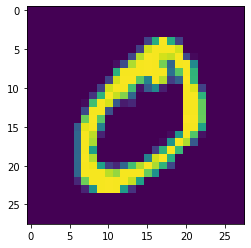

0


In [ ]:
#Now we'll do a demo of displaying any image from the training data numpy array X_train
plt.imshow(X_train[1])
plt.show()

#printing the corresponding label of the image
print(Y_train[1])

checking image labels

In [ ]:
#finding all the unique values present in our Y_train and Y_test numpy arrays
print(np.unique(Y_train))

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


All the images should have same dimensions in the dataset, and if not then we have to resize all the images to a common dimension

In [ ]:
# scaling the values
#NORMALIZATION- rescaling real-valued numeric attributes into a 0 to 1 range
X_train = X_train/255
X_test = X_test/255
print(X_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

setting up the layers of the neural network

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(75, activation='relu'),
                          keras.layers.Dense(75, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2640 - accuracy: 0.9236
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1162 - accuracy: 0.9646
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0841 - accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0655 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0514 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0440 - accuracy: 0.9860
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0359 - accuracy: 0.9883
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0293 - accuracy: 0.9906
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0276 - accuracy: 0.9905
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.022

Training Data accuracy is 99.16%

Accuracy on Test Data (Evaluating our neural network)

-> MODEL EVALUATION

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0956 - accuracy: 0.9773
0.9772999882698059


Test data accuracy is 97.8%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


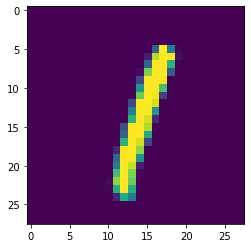

In [ ]:
# first data point in X_test
plt.imshow(X_test[5])
plt.show()

In [ ]:
print(Y_test[5])

1


In [ ]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[5])

[1.7476006e-05 9.9999744e-01 1.4509355e-03 2.9199471e-06 8.9802039e-01
 5.7736516e-04 3.6044817e-03 9.8681462e-01 9.4780177e-02 7.3923118e-04]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
# converting the prediction probabilities to class label
label_for_sixth_test_image = np.argmax(Y_pred[5])
print(label_for_sixth_test_image)

1


In [ ]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 973    0    0    1    0    0    3    1    2    0]
 [   1 1122    3    0    0    1    2    0    6    0]
 [   3    1 1004    3    2    0    4    7    8    0]
 [   1    0    4  975    0   19    1    4    4    2]
 [   0    0    4    0  968    0    4    2    1    3]
 [   2    0    0    7    1  869    7    1    4    1]
 [   2    1    2    1    4    1  946    0    1    0]
 [   2    3    7    1    2    1    0 1008    1    3]
 [   2    1    3    8    4    7    2    3  941    3]
 [   1    3    0    4   21    4    0    5    4  967]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'PREDICTED LABELS')

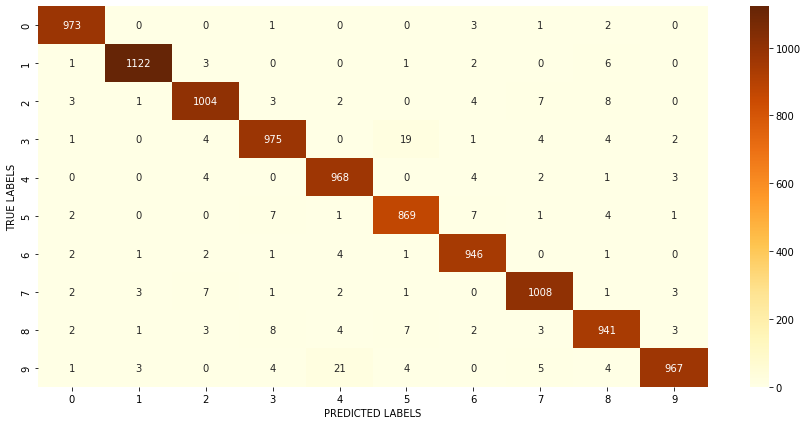

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlOrBr')
plt.ylabel('TRUE LABELS')
plt.xlabel('PREDICTED LABELS')

In [ ]:
input_image_path = '/content/sample_data/mnist4.png'

input_image = cv2.imread(input_image_path)

In [ ]:
cv2_imshow(input_image)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(25, 27)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 18ms/step
[[1.2436093e-05 3.0846462e-02 3.9011426e-02 4.1124272e-06 9.9999970e-01
  4.3014871e-04 3.7156962e-04 7.1131089e-03 1.1064409e-04 2.5653157e-01]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

4


In [ ]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

Path of the image to be predicted:/content/sample_data/mnist4.png


1/1 [==============================] - 0s 16ms/step
The Handwritten Digit is recognised as  4
